In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import gc

# 경고 메시지가 뜨지 않게 설정
import warnings 
warnings.filterwarnings('ignore')

# 그래프 설정
sns.set()

# 그래프 기본 설정
plt.rcParams['font.family'] = 'Malgun Gothic'
# plt.rcParams['font.family'] = 'AppleGothic'
plt.rcParams['figure.figsize'] = 12, 6
plt.rcParams['font.size'] = 14
plt.rcParams['axes.unicode_minus'] = False

# matplotlib 설정
from matplotlib.ticker import ScalarFormatter
from matplotlib.ticker import FuncFormatter

def comma_formatter(x, pos):
    return f'{int(x):,}'
# 검정
from scipy import stats

- 데이터 불러오기

In [5]:
check = pd.read_parquet('2018_회원정보.parquet')

In [3]:
df = pd.read_csv('병합_selected_features.csv')

In [7]:
df[list(check.columns)]

KeyError: "['기준년월', '남녀구분코드', '연령', '회원여부_이용가능_카드론', '소지여부_신용', '회원여부_연체', '이용거절여부_카드론', '동의여부_한도증액안내', '수신거부여부_TM', '수신거부여부_SMS', '가입통신회사코드', '탈회횟수_누적', '최종탈회후경과월', '탈회횟수_발급6개월이내', '거주시도명', '직장시도명', '유효카드수_체크', '유효카드수_체크_가족', '이용가능카드수_신용체크', '이용가능카드수_신용_가족', '이용가능카드수_체크_가족', '이용카드수_신용체크', '이용카드수_신용', '이용카드수_신용_가족', '이용카드수_체크', '이용카드수_체크_가족', '이용금액_R3M_신용_가족', '이용금액_R3M_체크_가족', '_1순위카드이용금액', '_1순위신용체크구분', '_2순위카드이용금액', '_2순위카드이용건수', '_2순위신용체크구분', '최종유효년월_신용_이용가능', '최종유효년월_신용_이용', '최종카드발급일자', '이용여부_3M_해외겸용_본인', '보유여부_해외겸용_신용_본인', '이용여부_3M_해외겸용_신용_본인', '연회비발생카드수_B0M', '연회비할인카드수_B0M', '기본연회비_B0M', '제휴연회비_B0M', '할인금액_기본연회비_B0M', '할인금액_제휴연회비_B0M', '청구금액_기본연회비_B0M', '청구금액_제휴연회비_B0M', '상품관련면제카드수_B0M', '임직원면제카드수_B0M', '우수회원면제카드수_B0M', '기타면제카드수_B0M', '카드신청건수', 'Life_Stage'] not in index"

In [8]:
drop_list = ['기준년월', '남녀구분코드', '연령', '회원여부_이용가능_카드론', '소지여부_신용', '회원여부_연체', '이용거절여부_카드론', '동의여부_한도증액안내',
 '수신거부여부_TM', '수신거부여부_SMS', '가입통신회사코드', '탈회횟수_누적', '최종탈회후경과월', '탈회횟수_발급6개월이내', '거주시도명', '직장시도명',
 '유효카드수_체크', '유효카드수_체크_가족', '이용가능카드수_신용체크', '이용가능카드수_신용_가족', '이용가능카드수_체크_가족', '이용카드수_신용체크',
 '이용카드수_신용', '이용카드수_신용_가족', '이용카드수_체크', '이용카드수_체크_가족', '이용금액_R3M_신용_가족', '이용금액_R3M_체크_가족',
 '_1순위카드이용금액', '_1순위신용체크구분', '_2순위카드이용금액', '_2순위카드이용건수', '_2순위신용체크구분', '최종유효년월_신용_이용가능',
 '최종유효년월_신용_이용', '최종카드발급일자', '이용여부_3M_해외겸용_본인', '보유여부_해외겸용_신용_본인', '이용여부_3M_해외겸용_신용_본인',
 '연회비발생카드수_B0M', '연회비할인카드수_B0M', '기본연회비_B0M', '제휴연회비_B0M', '할인금액_기본연회비_B0M', '할인금액_제휴연회비_B0M',
 '청구금액_기본연회비_B0M', '청구금액_제휴연회비_B0M', '상품관련면제카드수_B0M', '임직원면제카드수_B0M', '우수회원면제카드수_B0M', 
             '기타면제카드수_B0M', '카드신청건수', 'Life_Stage']

In [15]:
df = df[list(check.drop(drop_list, axis = 1).columns)]

In [16]:
df

,ID,Segment,회원여부_이용가능,회원여부_이용가능_CA,소지카드수_유효_신용,소지카드수_이용가능_신용,입회일자_신용,입회경과개월수_신용,수신거부여부_DM,수신거부여부_메일,...,이용가능카드수_신용,이용가능카드수_체크,이용금액_R3M_신용체크,이용금액_R3M_신용,이용금액_R3M_체크,_1순위카드이용건수,보유여부_해외겸용_본인,이용가능여부_해외겸용_본인,이용가능여부_해외겸용_신용_본인,최종카드발급경과월
0,TRAIN_000000,D,1,1,1,1,20130101,71,0,0,...,1,1,-454,-454,0,25,0,0,0,27
1,TRAIN_000001,E,1,1,1,1,20170801,16,0,0,...,1,0,7089,7089,0,31,0,0,0,23
2,TRAIN_000002,C,1,1,1,1,20080401,128,0,0,...,1,1,27336,27336,0,52,1,1,0,25
3,TRAIN_000003,D,1,1,2,2,20160501,31,0,0,...,2,1,4270,4270,0,27,1,1,1,22
4,TRAIN_000004,E,1,1,1,1,20180601,6,0,1,...,1,1,9385,7387,1997,-2,1,1,0,20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
399995,TRAIN_399995,E,1,1,1,1,20010701,209,0,0,...,1,1,10755,7267,3488,3,1,1,1,39
399996,TRAIN_399996,D,1,1,1,1,20170701,17,0,0,...,1,0,27636,27636,0,38,1,1,1,24
399997,TRAIN_399997,C,1,1,1,1,20090501,115,1,1,...,1,0,23187,23187,0,33,1,1,1,18
399998,TRAIN_399998,E,1,1,1,1,20130101,71,1,1,...,1,0,0,0,0,-2,0,0,0,27


In [21]:
for idx, val in enumerate(df.columns) :
    print(f'{idx} : {val}')

0 : ID
1 : Segment
2 : 회원여부_이용가능
3 : 회원여부_이용가능_CA
4 : 소지카드수_유효_신용
5 : 소지카드수_이용가능_신용
6 : 입회일자_신용
7 : 입회경과개월수_신용
8 : 수신거부여부_DM
9 : 수신거부여부_메일
10 : 탈회횟수_발급1년이내
11 : 마케팅동의여부
12 : 유효카드수_신용체크
13 : 유효카드수_신용
14 : 유효카드수_신용_가족
15 : 이용가능카드수_신용
16 : 이용가능카드수_체크
17 : 이용금액_R3M_신용체크
18 : 이용금액_R3M_신용
19 : 이용금액_R3M_체크
20 : _1순위카드이용건수
21 : 보유여부_해외겸용_본인
22 : 이용가능여부_해외겸용_본인
23 : 이용가능여부_해외겸용_신용_본인
24 : 최종카드발급경과월


### 고객의 분류하는 기준이 되는 변수 찾기

#### 1.회원여부_이용가능
- 분실/연체/한도 소진 등의 이유로 블랙리스트로 등재되지 않은 회원인지 여부를 나타내는 데이터

In [68]:
# 회원여부_이용가능의 분포를 확인한다.
df['회원여부_이용가능'].value_counts(normalize = True)

회원여부_이용가능
1    0.946937
0    0.053062
Name: proportion, dtype: float64

In [71]:
# 블랙리스트로 등재된 회원의 세그먼트 비율을 확인해 본다.
df.loc[df['회원여부_이용가능'] == 0, 'Segment'].value_counts(normalize = True)

Segment
E    0.961178
D    0.031048
C    0.007774
Name: proportion, dtype: float64

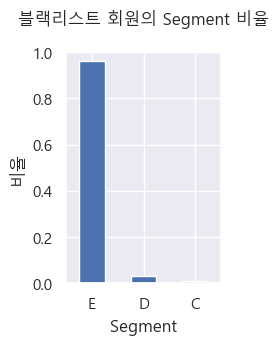

In [87]:
plt.figure(figsize = (2, 3))

segment_ratio = df.loc[df['회원여부_이용가능'] == 0, 'Segment'].value_counts(normalize=True)
segment_ratio.plot(kind='bar')

plt.title('블랙리스트 회원의 Segment 비율', pad = 20)
plt.ylabel('비율')
plt.xlabel('Segment')
plt.xticks(rotation = 0)
plt.ylim(0, 1)
plt.show()

- 블랙리스트로 등재된 회원은 대부분 E 유형의 고객이다.

#### 2.회원여부_이용가능_CA
- 분실/연체/한도 소진 등의 이유로 현급 서비스 이용이 가능한 고객인지 여부를 확인하는 데이터

In [88]:
df['회원여부_이용가능_CA'].value_counts()

회원여부_이용가능_CA
1    348455
0     51545
Name: count, dtype: int64

In [82]:
# 현금 서비스가 불가능한 회원의 Segment 비율을 확인해 본다.
df.loc[df['회원여부_이용가능_CA'] == 0, 'Segment'].value_counts(normalize = True)

Segment
E    0.903250
D    0.073392
C    0.023300
A    0.000039
B    0.000019
Name: proportion, dtype: float64

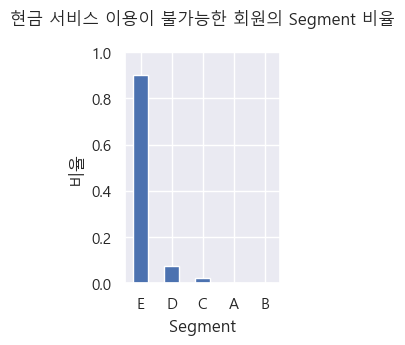

In [86]:
plt.figure(figsize = (2, 3))

segment_ratio = df.loc[df['회원여부_이용가능_CA'] == 0, 'Segment'].value_counts(normalize=True)
segment_ratio.plot(kind='bar')

plt.title('현금 서비스 이용이 불가능한 회원의 Segment 비율', pad = 20)
plt.ylabel('비율')
plt.xlabel('Segment')
plt.xticks(rotation = 0)
plt.ylim(0, 1)
plt.show()

#### 3.소지카드수_유효_신용

In [89]:
df['소지카드수_유효_신용'].value_counts()

소지카드수_유효_신용
1    302723
2     65465
3     20961
0     10825
4        26
Name: count, dtype: int64

#### 4.소지카드수_이용가능_신용

In [90]:
df['소지카드수_이용가능_신용'].value_counts()

소지카드수_이용가능_신용
1    284318
2     61727
0     36984
3     16971
Name: count, dtype: int64

In [93]:
sum(df['소지카드수_유효_신용'] == df['소지카드수_이용가능_신용']) / df.shape[0]

0.908325

- 두 칼럼을 비교했을 때 91% 정도가 일치한다.
- 두 칼럼의 차이를 필터링 하여 특정 Segment에 편향되어 있는지 확인해 본다.

In [106]:
# 차이가 있는 경우만
diff_df = df.loc[df['소지카드수_유효_신용'] != df['소지카드수_이용가능_신용']]

# Segment별 비율
diff_df['Segment'].value_counts(normalize=True)

Segment
E    0.828743
D    0.121980
C    0.048868
A    0.000355
B    0.000055
Name: proportion, dtype: float64